<a href="https://colab.research.google.com/github/genesisvegag/Comision39960/blob/main/Preentrega_II_Vega_Gamez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La receta para un hit en Spotify

Para las disqueras y artistas resulta importante crear música que sea del gusto del público en general. Es por esto que las listas de canciones de plataformas de streaming de musica se han dado a la tarea de registrar las canciones más populares de las épocas. Analizando bien las estructuras y los elementos de las canciones más escuchadas por el grupo de usuarios de Spotify.

De esta manera, a continuación se visualiza la receta de un hit en Spotify:

In [ ]:
import pandas as pd
df = pd.read_csv('/content/songs_normalize.csv')

In [ ]:
# import
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt

In [ ]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
# eliminar duplicados
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


# El artista
**¿Qué tipo de artista logra destacar más y producir más hits musicales?**

De acuerdo a la base de datos, el sexo que predomina ligeramente es el masculino dentro de los 10 artistas con más canciones populares. Dentro del grupo de los artistas masculinos más escuchados, se puede decir que la mayoría son raperos y la segunda mayoría son DJs. En cuanto a las artistas femeninas más escuchadas, todas son cantantes.

In [ ]:
px.bar(df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(10),x='artist',y='song',labels={'song':'Canciones'},width=1000,color_discrete_sequence=['green'],text='song',title='<b> Artistas con las más canciones populares en Spotify')

# El género

El siguiente paso para una disquera o artista sobre cómo aumentar las posibilidades de tener un hit musical, es identificar los géneros musicales que más disfruta el público. Esto es importante porque se pueden identificar oportunidades de colaboraciones de artistas de tal género al igual que los instrumentos y más características técnicas de las canciones acorde a su género.

De esta manera, se puede apreciar la relevancia de los géneros pop y hip hop.

In [ ]:
data_2=df[['song','genre']].groupby(by='genre').count()

df_genre=data_2['song']>=16
filtered_df = data_2[df_genre]
filtered_df.sort_values('song', ascending=False, inplace=True)
print(filtered_df)

                                song
genre                               
pop                              428
hip hop, pop                     277
hip hop, pop, R&B                244
pop, Dance/Electronic            221
pop, R&B                         178
hip hop                          124
hip hop, pop, Dance/Electronic    78
rock                              58
rock, pop                         43
Dance/Electronic                  41
rock, metal                       38
pop, latin                        28
pop, rock                         26
set()                             22
hip hop, Dance/Electronic         16


<ipython-input-12-9ffc465f0eec>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


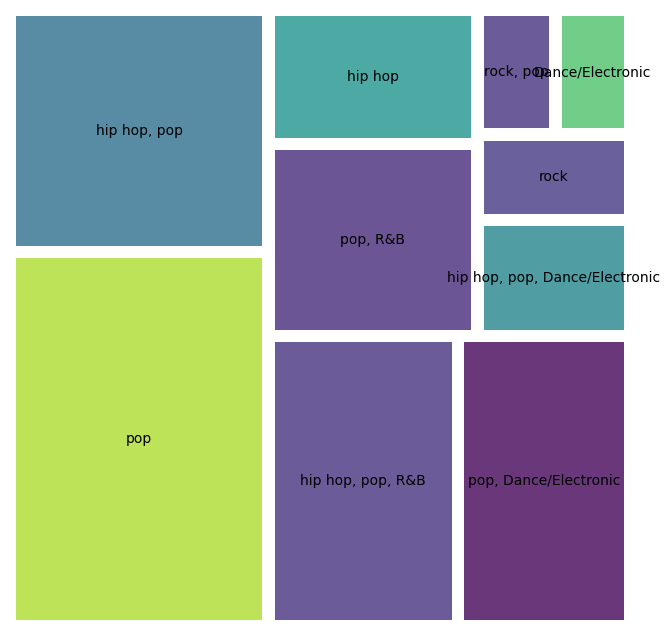

In [ ]:
fig, ax = plt.subplots(1, figsize = (8,8))
squarify.plot(sizes=[428,277,244,221,178,124,78,58,43,41],
              label=["pop", "hip hop, pop", "hip hop, pop, R&B", "pop, Dance/Electronic", "pop, R&B", "hip hop", "hip hop, pop, Dance/Electronic", "rock", "rock, pop", "Dance/Electronic"  ],
              alpha=.8,
              pad=2)
plt.axis('off')
plt.show()

# Las características musicales




##¿Cuáles características de canciones comparten relación?

Si las canciones tienen alto nivel de speechiness (contienen letras para cantar) es más probable que tenga un mayor grado de popularidad.

Igualmente, más energía refleja un nivel más alto de bailabilidad y tiene una correlacion positiva con lo ruidoso de las pistas.

In [ ]:
px.scatter(df,x='speechiness',y='popularity',color='speechiness',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b> Speechiness vs Popularity')

In [ ]:
px.scatter(df,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='<b>Energy vs Danceability')

In [ ]:
px.scatter(df,x='energy',y='loudness',color_discrete_sequence=['lightgreen'],template='plotly_dark',title='<b>Energy vs Loudness')

## ¿Cómo las canciones más populares con el público han evolucionado?


1.  'Danceability' describe qué tan adecuada es una canción para bailar. Un valor de 0.0 es menos bailable y 1.0 es más bailable. De acuerdo a la gráfica 1, la métrica sufrió una ligera disminución a través de los años. Sin embargo, a partir del 2015, está empieza a tener una tendencia creciente.
2.  'Valence' describe la positividad musical transmitida por una canción. Las pistas con una valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas (p. ej., tristes, deprimidas, de enojo). De acuerdo a la gráfica, se observa una tendencia decreciente a partir de los inicios de los 2000s para luego iniciar un repunte alrededor del 2018 en camino al 2020. Es interesante notar que esta es la medida con una tendencia más fuerte y da a entender que las canciones empezaron a connotar temás más negativos a través de los años.
3. 'Speechiness' detecta la presencia de palabras habladas en una pista. Cuanto más parecida a una conversación sea la grabación, más cerca de 1.0 será el valor del atributo. La gráfica nos muestra un desplome significativo a finales de los 90s, lo cual puede ser explicado por la transición de popularidad del rap y hip hop a canciones con sintetizadores, batería electro-punk, reverb, géneros dubstep y EDM (música electrónica). Lo cual hace que establezca estabilidad a través de los años.
4. 'Instrumentalness' representa la probabilidad de que la canción no contenga contenido vocal según el valor se acerque más a 1.0. Esta es la métrica más estable de las presentadas en el gráfico. La tendencia de los valores son valores menores por lo que indica que las canciones populares siguen siendo más los que la gente puede cantar las letras.


In [ ]:
m1 = df.groupby('year')[['popularity','danceability','speechiness','instrumentalness','valence']].mean()
m1

,popularity,danceability,speechiness,instrumentalness,valence
year,,,,,
1998,49.000000,0.727000,0.291000,0.000000,0.527000
1999,64.921053,0.668974,0.067224,0.009172,0.574008
2000,58.554054,0.689824,0.077557,0.030429,0.647973
2001,59.407407,0.674130,0.107445,0.021340,0.661041
2002,62.400000,0.675244,0.124220,0.010083,0.575156
2003,58.793814,0.664876,0.117113,0.038006,0.607632
2004,58.427083,0.696833,0.125802,0.015842,0.608881
2005,61.759615,0.672923,0.127886,0.018278,0.553077
2006,57.389474,0.660863,0.116444,0.001916,0.601274


Text(0, 0.5, 'Valor')

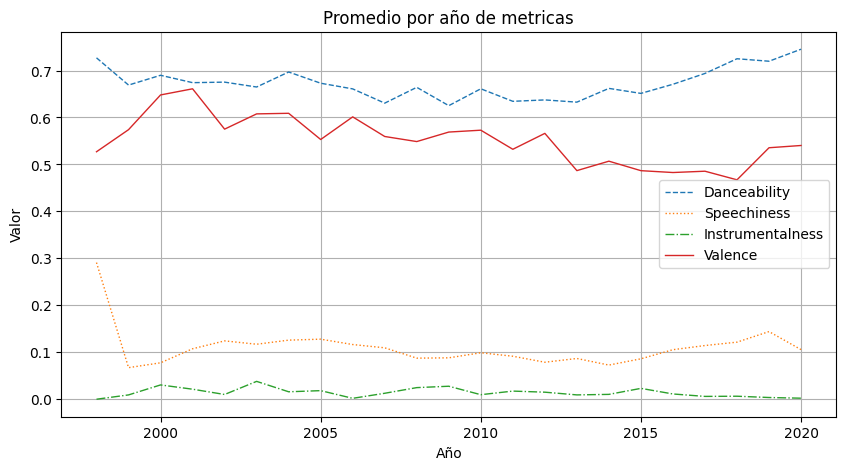

In [ ]:
fig,ax= plt.subplots(figsize=(10,5))
ax.plot(m1.index, m1.danceability, label='Danceability',linewidth=1,linestyle='--')
ax.plot(m1.index, m1.speechiness, label='Speechiness',linewidth=1,linestyle=':')
ax.plot(m1.index, m1.instrumentalness, label='Instrumentalness',linewidth=1,linestyle='dashdot')
ax.plot(m1.index, m1.valence, label='Valence',linewidth=1,linestyle='solid')

ax.legend()
ax.grid()
ax.set_title('Promedio por año de metricas')
ax.set_xlabel('Año')
ax.set_ylabel('Valor')

## ¿Cuáles caracterísitcas de canciones pueden ser predecibles acorde a su distribución?
Las variables de popularidad, bailabilidad y valence se asemejan mas a una distribucion normal por lo que seria mas facil de predecir estas caracteristicas en un modelo de prediccion para acertar sobre canciones que se convertiran en hits musicales.

In [ ]:
fig=make_subplots(rows=2,cols=2,subplot_titles=('<i>popularity', '<i>danceability', '<i>speechiness', '<i>valence'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=2,col=2)
fig.update_layout(height=900,width=900,title_text='<b>Distribución de características')
fig.update_layout(template='plotly_dark',title_x=0.5)

# ¿Cuál es la correlación de las caracteristicas con cada una?

<ipython-input-17-b906bafe61ce>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



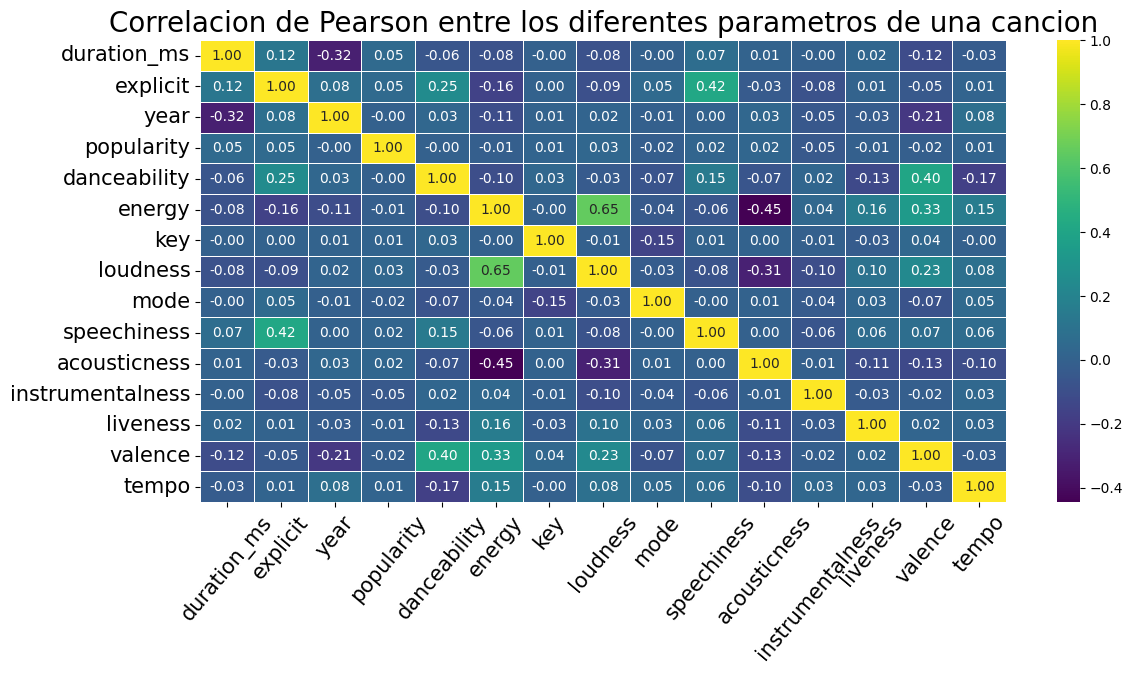

In [ ]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Correlacion de Pearson entre los diferentes parametros de una cancion', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

# La duracion

Debe de haber un balance en la duracion de una cancion popular ya que no puede ser muy larga o muy corta. La mediana de la duracion de las canciones es de aproximadamente 227848 microsegundos = 3.8 minutos. El 50% de las canciones duran entre 203580 microsegundos = 3.4 minutos y 248133 microsegundos = 4.1 minutos.
De entre los valores atípicos, son más los que superan la mediana.


Se podria considerar que la cancion debe ser lo suficientemente larga para cantar pero no tanto como para tomarse un break de 5 minutos de algo.

In [ ]:
px.box(df,y='duration_ms',template='plotly_dark',color_discrete_sequence=['cyan'],title='<b>Duracion de canciones populares')

In [ ]:
def ms_to_minsec(ms):
    sec = ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"

durations = df[['duration_ms','year']].groupby('year').mean().reset_index().iloc[2:22]
durations['duration_s'] = durations['duration_ms'] / 1000
durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)


iplot(px.line(durations,
        x='year',
        y='duration_s',
        title='promedio de la duracion de las canciones a traves de los años',
        text='min:sec'
       ).update_xaxes(type='category').update_traces(textposition='top right'))